In [1]:
import tensorflow as tf
import numpy as np
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

input_x_dim = x_train.shape[1]
input_y_dim = x_train.shape[2]
input_dim = input_x_dim * input_y_dim

x_train = np.reshape(x_train, (len(x_train), input_dim))
x_test = np.reshape(x_test, (len(x_test), input_dim))

hidden_code_dim = 16

In [2]:
from mlp_vae import MLPVariationalAutoEncoder

In [3]:
model = MLPVariationalAutoEncoder(input_dim, hidden_code_dim, [512, 128])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='mean_squared_error')

In [4]:
history = model.fit(x_train, x_train, batch_size=512, epochs=25, verbose=1, validation_data=(x_test, x_test), shuffle=True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 3s 50us/sample - loss: 0.2032 - val_loss: 0.1052
Epoch 2/25
60000/60000 [==============================] - 1s 23us/sample - loss: 0.0792 - val_loss: 0.0797
Epoch 3/25
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0682 - val_loss: 0.0729
Epoch 4/25
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0622 - val_loss: 0.0683
Epoch 5/25
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0573 - val_loss: 0.0676
Epoch 6/25
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0533 - val_loss: 0.0651
Epoch 7/25
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0492 - val_loss: 0.0637
Epoch 8/25
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0463 - val_loss: 0.0628
Epoch 9/25
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0442 - val_

In [5]:
import matplotlib.pyplot as plt
import random

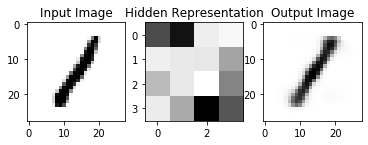

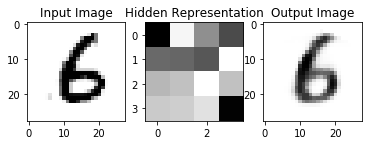

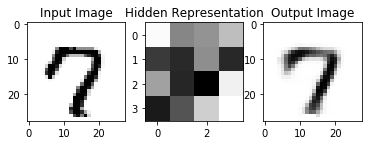

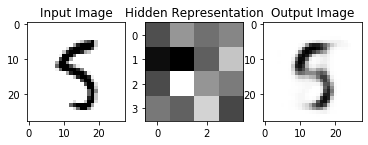

In [6]:
for _ in range(4):
    plt.subplot(1, 3, 1)
    plt.title("Input Image")
    test_case = x_test[random.randrange(x_test.shape[0])]
    test_case_img = np.reshape(test_case, (1, input_x_dim, input_y_dim))[0] * 255.0
    plt.imshow(test_case_img, cmap='Greys')

    plt.subplot(1, 3, 2)
    plt.title("Hidden Representation")
    encoded_dist = model.encode(np.array([test_case]))
    encoded = encoded_dist.sample()
    # The reshape command makes the 16-long hidden code by 4x4
    # so we can see it alongside the input and output
    encoded_img = np.reshape(tf.nn.sigmoid(encoded), (1, 4, 4))[0] * 255.0
    plt.imshow(encoded_img, cmap='Greys')

    plt.subplot(1, 3, 3)
    plt.title("Output Image")
    decoded = model.decode(np.array([encoded]))
    decoded_img = np.reshape(decoded, (1, input_x_dim, input_y_dim))[0] * 255.0
    plt.imshow(decoded_img, cmap='Greys')

    plt.show()

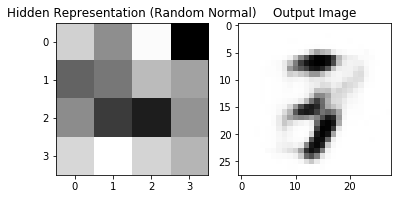

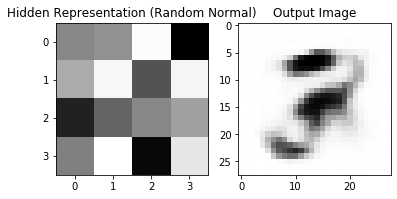

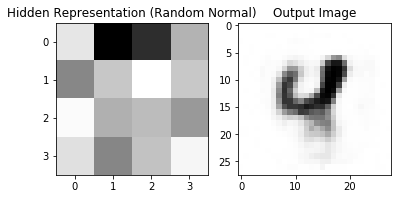

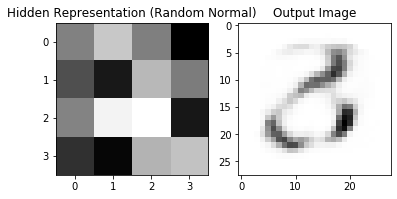

In [7]:
for _ in range(4):
    plt.subplot(1, 2, 1)
    plt.title("Hidden Representation (Random Normal)")
    random_encoded = tf.random.normal((1, 16))
    random_encoded_img = np.reshape(tf.nn.sigmoid(random_encoded), (1, 4, 4))[0] * 255.0
    plt.imshow(random_encoded_img, cmap='Greys')

    plt.subplot(1, 2, 2)
    plt.title("Output Image")
    random_decoded = model.decode(np.array([random_encoded]))
    random_decoded_img = np.reshape(random_decoded, (1, input_x_dim, input_y_dim))[0] * 255.0
    plt.imshow(random_decoded_img, cmap='Greys')

    plt.show()

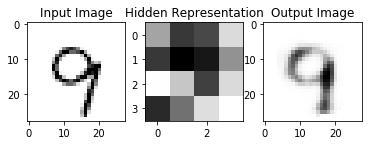

In [8]:
plt.subplot(1, 3, 1)
plt.title("Input Image")
test_case_1 = x_test[random.randrange(x_test.shape[0])]
test_case_img_1 = np.reshape(test_case_1, (1, input_x_dim, input_y_dim))[0] * 255.0
plt.imshow(test_case_img_1, cmap='Greys')

plt.subplot(1, 3, 2)
plt.title("Hidden Representation")
encoded_dist_1 = model.encode(np.array([test_case_1]))
encoded_1 = encoded_dist_1.sample()
# The reshape command makes the 16-long hidden code by 4x4
# so we can see it alongside the input and output
encoded_img_1 = tf.reshape(tf.nn.sigmoid(encoded_1), (1, 4, 4))[0] * 255.0
plt.imshow(encoded_img_1, cmap='Greys')

plt.subplot(1, 3, 3)
plt.title("Output Image")
decoded_1 = model.decode(np.array([encoded_1]))
decoded_img_1 = tf.reshape(decoded_1, (1, input_x_dim, input_y_dim))[0] * 255.0
plt.imshow(decoded_img_1, cmap='Greys')

plt.show()

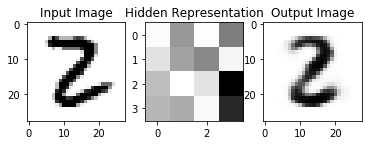

In [9]:
plt.subplot(1, 3, 1)
plt.title("Input Image")
test_case_2 = x_test[random.randrange(x_test.shape[0])]
test_case_img_2 = np.reshape(test_case_2, (1, input_x_dim, input_y_dim))[0] * 255.0
plt.imshow(test_case_img_2, cmap='Greys')

plt.subplot(1, 3, 2)
plt.title("Hidden Representation")
encoded_dist_2 = model.encode(np.array([test_case_2]))
encoded_2 = encoded_dist_2.sample()
# The reshape command makes the 16-long hidden code by 4x4
# so we can see it alongside the input and output
encoded_img_2 = np.reshape(tf.nn.sigmoid(encoded_2), (1, 4, 4))[0] * 255.0
plt.imshow(encoded_img_2, cmap='Greys')

plt.subplot(1, 3, 3)
plt.title("Output Image")
decoded_2 = model.decode(np.array([encoded_2]))
decoded_img_2 = np.reshape(decoded_2, (1, input_x_dim, input_y_dim))[0] * 255.0
plt.imshow(decoded_img_2, cmap='Greys')

plt.show()

In [10]:
new_encoded = (encoded_1 + encoded_2) / 2

In [11]:
new_encoded

<tf.Tensor: id=10181, shape=(1, 16), dtype=float32, numpy=
array([[-0.77880776,  0.46987912, -0.4208181 , -0.13957265,  0.0305562 ,
         0.7437132 ,  0.716341  , -0.6299027 , -0.777841  , -1.0027814 ,
        -0.01124266,  0.6604115 ,  0.39393452,  0.13155207, -1.0388384 ,
        -0.01851928]], dtype=float32)>

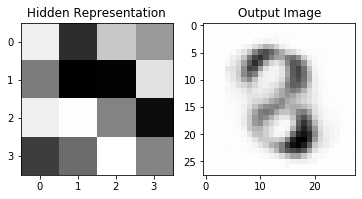

In [12]:
plt.subplot(1, 2, 1)
plt.title("Hidden Representation")
new_encoded_img = np.reshape(tf.nn.sigmoid(new_encoded), (1, 4, 4))[0] * 255.0
plt.imshow(new_encoded_img, cmap='Greys')

plt.subplot(1, 2, 2)
plt.title("Output Image")
new_decoded = model.decode(np.array([new_encoded]))
new_decoded_img = np.reshape(new_decoded, (1, input_x_dim, input_y_dim))[0] * 255.0
plt.imshow(new_decoded_img, cmap='Greys')

plt.show()

In [13]:
encoded_1

<tf.Tensor: id=9886, shape=(1, 16), dtype=float32, numpy=
array([[-0.00659342,  0.93281424,  0.79991984, -0.55459803,  0.9254121 ,
         1.5614737 ,  1.2600373 ,  0.133825  , -1.2182081 , -0.3011067 ,
         0.8667071 , -0.5454894 ,  1.0608168 ,  0.4196623 , -0.5933043 ,
        -1.2517154 ]], dtype=float32)>

In [14]:
test_set_encoded = model.encode(x_test)

In [15]:
test_set_encoded

<tfp.distributions.Normal 'Normal' batch_shape=[10000, 16] event_shape=[] dtype=float32>

In [16]:
test_set_encoded[:, 0]

<tfp.distributions.Normal 'Normal' batch_shape=[10000] event_shape=[] dtype=float32>

In [17]:
tf.reduce_mean(test_set_encoded[:, 3].mean())

<tf.Tensor: id=10501, shape=(), dtype=float32, numpy=0.009696414>

In [18]:
test_set_encoded_sampled = test_set_encoded.sample()

In [19]:
tf.reduce_mean(test_set_encoded_sampled[:, 7])

<tf.Tensor: id=10530, shape=(), dtype=float32, numpy=-0.014848867>

In [20]:
import tensorflow_probability as tfp
emp = tfp.distributions.Empirical(tf.transpose(test_set_encoded_sampled))

In [21]:
tf.reduce_mean(tfp.distributions.kl_divergence(
                tfp.distributions.Normal(emp.mean(), emp.stddev()),
                tfp.distributions.Normal(0.0, 1.0)
            ))

<tf.Tensor: id=10562, shape=(), dtype=float32, numpy=0.0010315615>

In [22]:
norm = tf.random.normal(test_set_encoded_sampled.shape, 0.0, 1.0)

In [23]:
norm

<tf.Tensor: id=10568, shape=(10000, 16), dtype=float32, numpy=
array([[ 0.22566509,  1.5256641 ,  1.6487263 , ..., -1.0607611 ,
         0.49171194, -0.73560894],
       [ 0.4361288 ,  0.40300477, -2.3032756 , ..., -0.32339516,
         0.01753691,  0.03437582],
       [-0.57567316,  1.3092613 ,  1.4166393 , ..., -1.6512414 ,
         0.87773347, -0.0243188 ],
       ...,
       [-0.37705088, -1.1263314 , -0.5717902 , ...,  0.7040304 ,
        -0.69816905,  0.9465678 ],
       [-0.2993711 ,  0.31037772,  0.57034284, ...,  0.64322364,
        -0.6820338 , -1.028377  ],
       [-0.22596107, -1.2117938 , -1.400221  , ...,  0.38785586,
         0.6519465 ,  0.4166853 ]], dtype=float32)>

In [24]:
emp_norm = tfp.distributions.Empirical(tf.transpose(norm))

In [25]:
emp_norm

<tfp.distributions.Empirical 'Empirical_Empirical' batch_shape=[16] event_shape=[] dtype=float32>

In [26]:
emp

<tfp.distributions.Empirical 'Empirical_Empirical' batch_shape=[16] event_shape=[] dtype=float32>

In [27]:
tf.reduce_sum(tfp.distributions.kl_divergence(
                tfp.distributions.Normal(emp_norm.mean(), emp_norm.stddev()),
                tfp.distributions.Normal(0.0, 1.0)
            ))

<tf.Tensor: id=10600, shape=(), dtype=float32, numpy=0.0011516957>